# California Cities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use("seaborn-v0_8")

[]

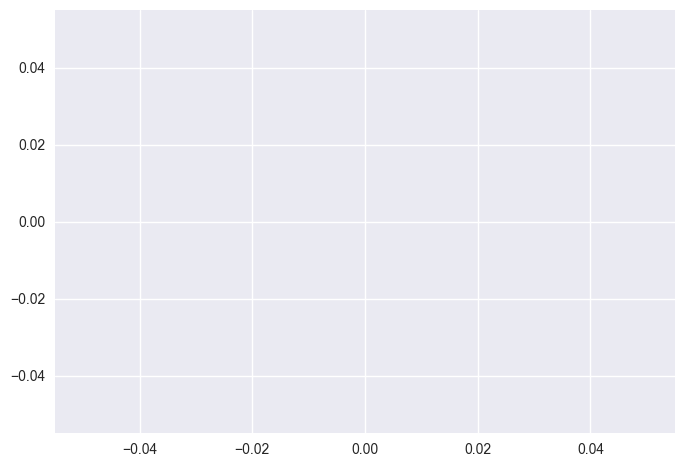

In [4]:
plt.plot()

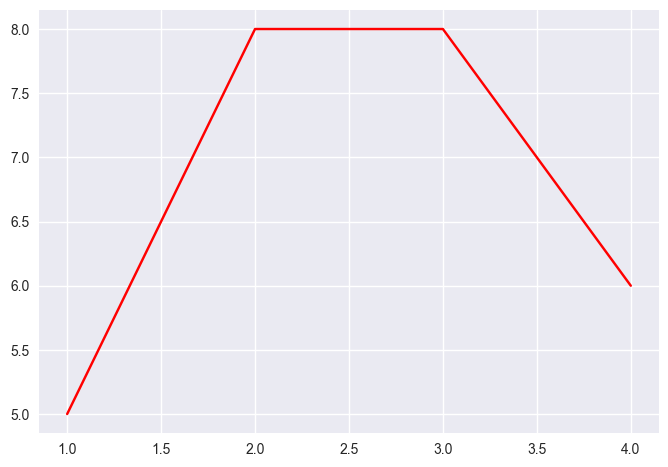

In [7]:
x = [1, 2, 3, 4]
y = [5, 8, 8, 6]
plt.plot(x, y, color="red");

## Pyplot API & (Object Oriented) OO API

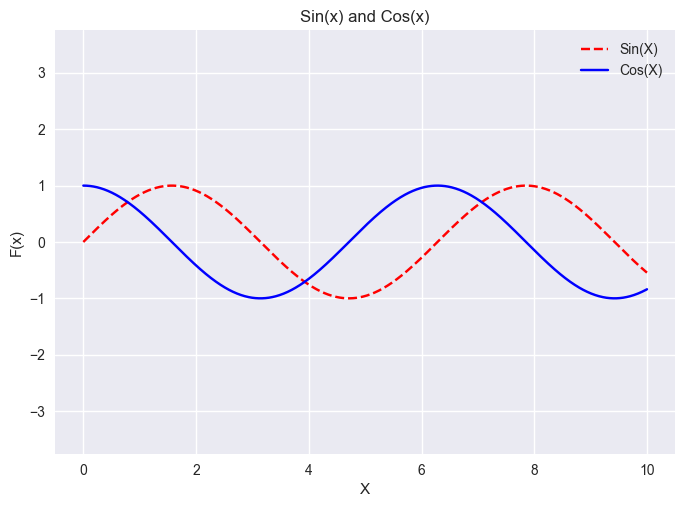

In [23]:
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), color="red", linestyle="dashed", label="Sin(X)")
plt.plot(x, np.cos(x), color="blue", linestyle="solid", label="Cos(X)")

plt.title("Sin(x) and Cos(x)")
plt.xlabel("X")
plt.ylabel("F(x)")
# plt.xlim([0,4])
# plt.ylim([-0.7,0.6])
plt.axis("equal")
# plt.axis("tight")

plt.legend();

## Object-Oriented API

[Text(0.5, 1.0, 'A simple plot'), Text(0.5, 0, 'x'), Text(0, 0.5, 'f(x)')]

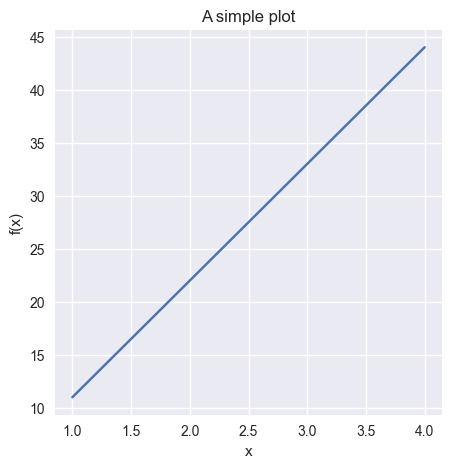

In [25]:
%matplotlib inline

x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

fig, ax = plt.subplots(figsize = (5,5))

ax.plot(x,y)

ax.set(
    title = "A simple plot",
    xlabel = "x",
    ylabel = "f(x)"
)

## Most common types of Matplotlib plots

### 1. Line

In [35]:
x = np.linspace(0, 10, 100)
x[:5]

array([0.       , 0.1010101, 0.2020202, 0.3030303, 0.4040404])

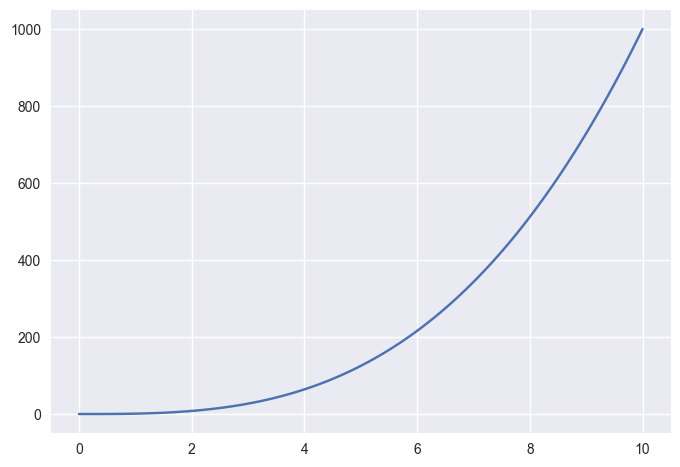

In [36]:
fig, ax = plt.subplots()
ax.plot(x, x**3)

### 2. Scatter

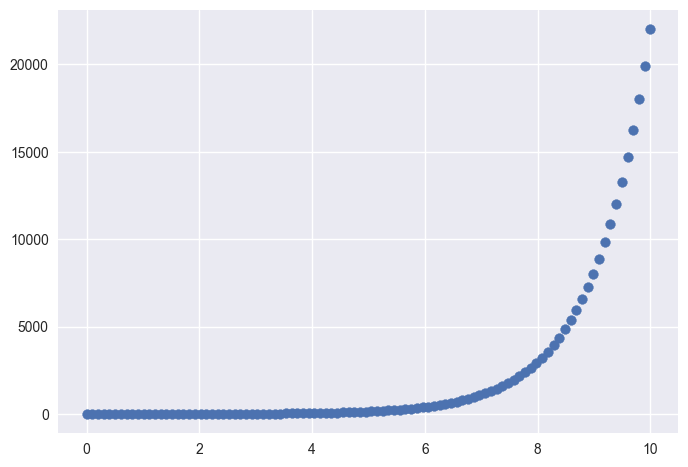

In [37]:
plt.scatter(x,np.exp(x))

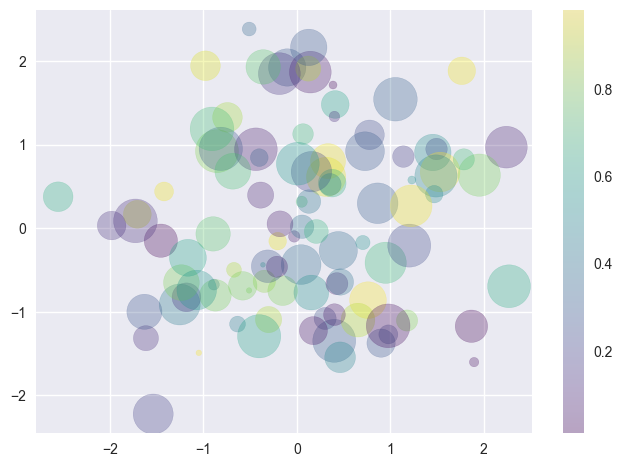

In [48]:
rng = np.random.RandomState(0)

x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

fig, ax = plt.subplots()
img1 = ax.scatter(x, y, s = sizes, c = colors, cmap = "viridis", alpha = 0.3)

fig.colorbar(img1);

### 3. Bar

<BarContainer object of 3 artists>

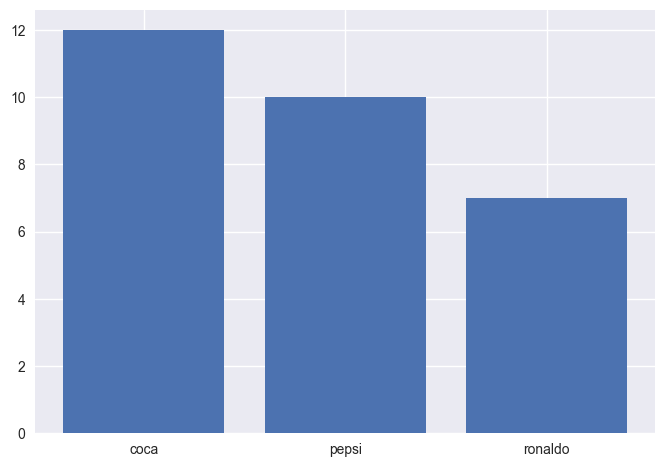

In [51]:
soft_drink_prices = { "coca": 12,
                        "pepsi": 10,
                        "ronaldo": 7}

fig, ax = plt.subplots()
ax.bar(soft_drink_prices.keys(), soft_drink_prices.values())

### 4. Hist

In [53]:
np.random.seed(42)

student_height = np.random.normal(170, 10, 250)

In [54]:
student_height[:10], len(student_height)

(array([174.96714153, 168.61735699, 176.47688538, 185.23029856,
        167.65846625, 167.65863043, 185.79212816, 177.67434729,
        165.30525614, 175.42560044]),
 250)

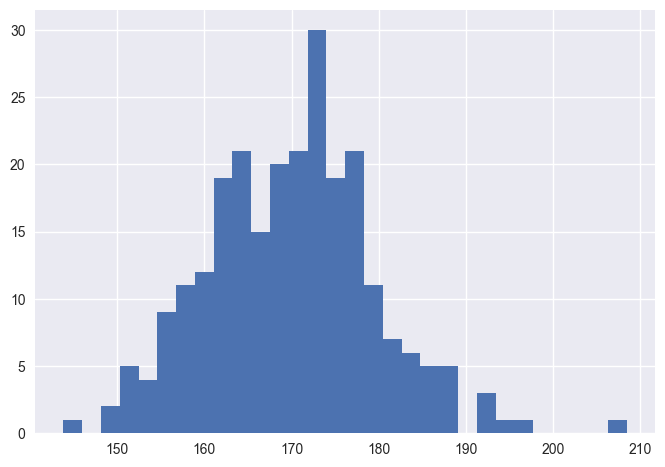

In [58]:
plt.hist(student_height, bins = 30);

### 4. Subplots

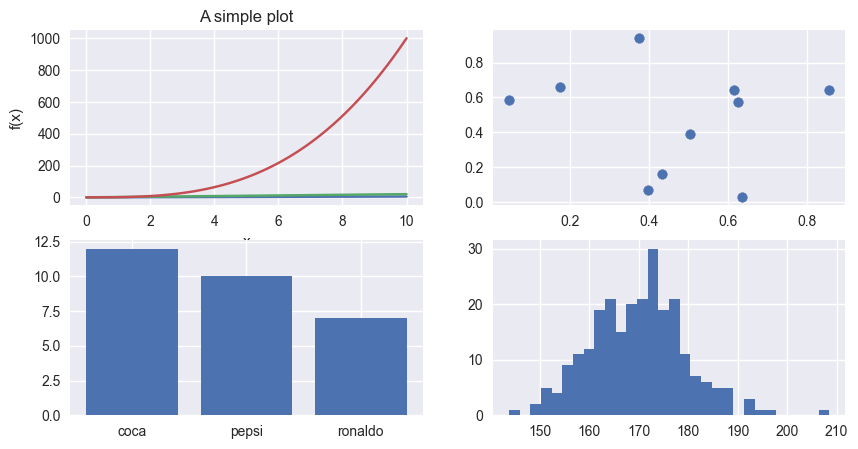

In [73]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 5))

ax1.plot(x, x/2)
ax1.plot(x, x*2)
ax1.plot(x, x**3)

ax1.set(
    title = "A simple plot",
    xlabel = "x",
    ylabel = "f(x)"
);

ax2.scatter(np.random.random(10), np.random.random(10))
ax3.bar(soft_drink_prices.keys(), soft_drink_prices.values())
ax4.hist(student_height, bins = 30);

# Project: Data Visualization - California Cities

In [79]:
# read data
cities = pd.read_csv('./data/california_cities.csv')
cities.head()

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


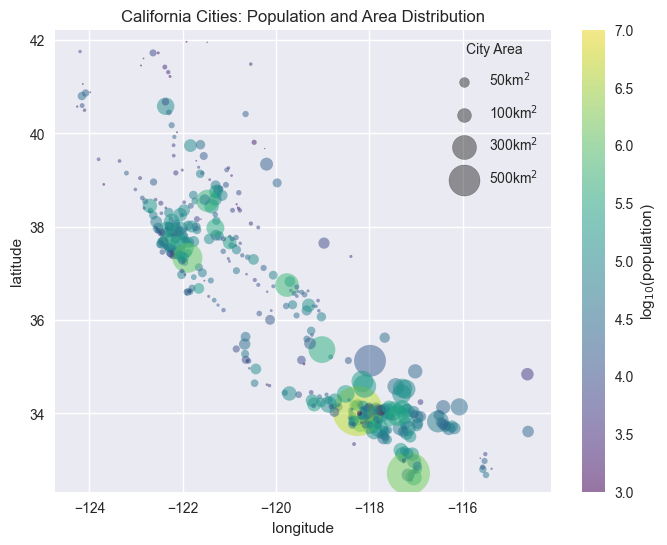

In [102]:
lat, lon = cities.latd, cities.longd
population, area = cities.population_total, cities.area_total_km2

plt.figure(figsize=(8,6))

plt.scatter(lon, lat, c = np.log10(population), s = area, cmap = 'viridis', linewidths = 0, alpha = 0.5)

plt.axis("equal")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.colorbar(label = 'log$_{10}$(population)')
plt.clim(3,7)

area_range = [50, 100, 300, 500]

for area in area_range:
    plt.scatter([], [], s = area, c = 'k', alpha = 0.4,
                label = str(area) + 'km$^2$')

plt.legend(labelspacing = 1, title = "City Area")
    
plt.title('California Cities: Population and Area Distribution');